In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


### Missing data  
Missing data occurs ehen values are simply absent or conatin NaN *(Not A Number)* for any feature (column) in a given dataset.  
This will cause issues with many machinelearning algorithms.

**Missing data can negativly impact:**
- Data visualization
- Arithmetic computations
- Machine learning algorithms

**Common methods to deal with missing data:**
- Remove roes or columns containing missing data
- Impute with mean or median
- Impute with mode (most freaquently occuring feature)
- Impute with forward or backward fill
- Interpolate data between two points



In [15]:
df = pd.DataFrame(np.random.randn(10,4), columns=["A", "B", "C", "D"])
df = df[df > 0]
df


,A,B,C,D
0,NaN,NaN,0.100131,1.421621
1,0.534627,0.924440,0.042905,NaN
2,2.438305,0.824504,1.660604,0.415508
3,NaN,NaN,0.240750,NaN
4,NaN,NaN,0.873462,0.124231
5,NaN,0.086085,0.050345,NaN
6,0.514382,1.113801,0.262988,2.020314
7,0.533180,0.249594,NaN,0.635325
8,NaN,NaN,NaN,NaN
9,1.117033,NaN,0.361846,NaN


In [22]:
copy = df.copy()
copy.drop(columns="D", inplace=True)


## dropna  
Remove rows (default) or columns containing null.

**Parameters**
- **how** = "any" (default), or "all"
- **thresh** = set number of (non-missing) values a row must contain in order to *not* drop
- **subset** only look for NaN in subset of columns (or rows)
- **axis** = "index" (default), or "columns"


*NOTE: Domain knowledge is often needed to fill with valid data*

In [49]:
copy.dropna( axis="columns", subset=5)
# copy


,B,C
0,NaN,0.100131
1,0.924440,0.042905
2,0.824504,1.660604
3,NaN,0.240750
4,NaN,0.873462
5,0.086085,0.050345
6,1.113801,0.262988
7,0.249594,NaN
8,NaN,NaN
9,NaN,0.361846


In [58]:
copy = df.copy()
copy["A"].fillna(copy["A"].median(), inplace=True)
copy["B"].ffill(inplace=True)
copy["D"].bfill(inplace=True)
copy["C"].interpolate(inplace=True)

copy

,A,B,C,D
0,0.534627,NaN,0.100131,1.421621
1,0.534627,0.924440,0.042905,0.415508
2,2.438305,0.824504,1.660604,0.415508
3,0.534627,0.824504,0.240750,0.124231
4,0.534627,0.824504,0.873462,0.124231
5,0.534627,0.086085,0.050345,2.020314
6,0.514382,1.113801,0.262988,2.020314
7,0.533180,0.249594,0.295941,0.635325
8,0.534627,0.249594,0.328893,NaN
9,1.117033,0.249594,0.361846,NaN


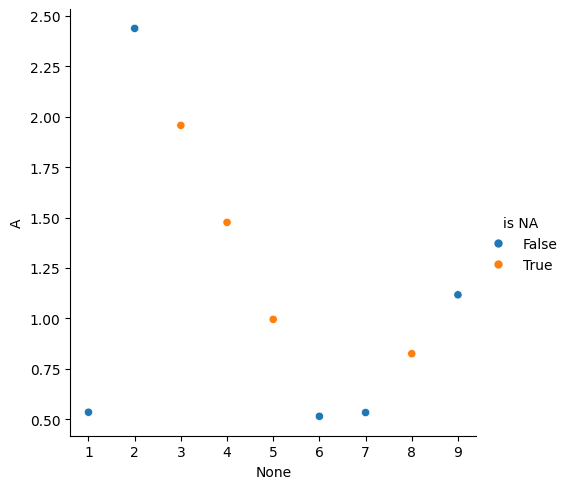

In [63]:
copy = df.copy()
copy["is NA"] = copy["A"].isna()
copy["A"].interpolate(inplace=True)
sns.relplot(x=copy.index, y = "A", hue="is NA", data=copy)